# Introduction to statistics with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

## The data

National Survey of Family Growth, taken from https://github.com/AllenDowney/ThinkStats2


* `caseid` is the integer ID of the respondent.
* `prglngth` is the integer duration of the pregnancy in weeks.
* `outcome` is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.
* `pregordr` is a pregnancy serial number; for example, the code for a respondent’s first pregnancy is 1, for the second pregnancy is 2, and so on.
* `birthord` is a serial number for live births; the code for a respondent’s first child is 1, and so on. For outcomes other than live birth, this field is blank.
* `birthwgt_lb` and birthwgt_oz contain the pounds and ounces parts of the birth weight of the baby.
* `agepreg` is the mother’s age at the end of the pregnancy.
* `finalwgt` is the statistical weight associated with the respondent. It is a floating-point value that indicates the number of people in the U.S. population this respondent represents.
* `poverty`: poverty level income

More information at https://www.icpsr.umich.edu/icpsradmin/nsfg/search

In [ ]:
import pandas as pd

pd.options.display.max_columns = None

df = pd.read_csv('nsfg.csv', index_col=0)
df.head(5)

In [ ]:
type(df)

## `matplotlib`

We are only going to use the most basic functions of matplotlib

In [ ]:
import matplotlib.pyplot as plt


### Histogram

In [ ]:
df['birthwgt_lb'].hist()#histograma de los datos
df['birthwgt_g'] = df['birthwgt_lb'] * 453 + df['birthwgt_oz'] * 28.35
df['birthwgt_g'].hist()

### Bar plot

In [ ]:
import numpy as np

n = 5

plt.bar(range(n), np.random.randint(20, size=n))
plt.xticks(range(n), ['French','Thai','Spanish','British','Argentine'])

### Scatter plot

In [ ]:
plt.scatter(df['agepreg'], df['birthwgt_g'], c=df['pregordr'])

## Descriptive statistics

### Measures of centrality

#### Average

$$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

#### Median

50th percentile

In [ ]:
plt.hist(df['birthwgt_g'], bins=50);
plt.axvline(df['birthwgt_g'].mean(), c='red');
plt.axvline(df['birthwgt_g'].median(), c='green');

### Measures of dispersion

#### Variance and standard deviation

$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

In [ ]:
mean = df['birthwgt_g'].mean()
mean

In [ ]:
var = ((df['birthwgt_g'] - mean) ** 2).sum() / len(df['birthwgt_g'])
var

In [ ]:
std = var ** .5
std

In [ ]:
#CUANDO NORMALIZAMOS PERDEMOS LA DIMENSION -> ES JUSTO EL OBJETIVO

In [ ]:
plt.hist(df['birthwgt_g'], bins=50);
plt.axvline(df['birthwgt_g'].mean(), c='red');
plt.axvline(df['birthwgt_g'].mean() - std, c='orange');
plt.axvline(df['birthwgt_g'].mean() + std, c='orange');
plt.axvline(df['birthwgt_g'].median(), c='green');

### z-score

$$z_i = \frac{x_i - \mu}{\sigma}$$

#### Exercise

Calculate the z-scores of every `birthweight_g` and plot them like we have just done.

In [ ]:
zscore = (df['birthwgt_g'] - df['birthwgt_g'].mean()) / df['birthwgt_g'].std();
plt.hist(zscore,bins = 50)

## Correlation and covariance

Let's make up some data to play around:

In [ ]:
n = 500

xs = np.random.uniform(-200, 400, size=n)
ys = xs * 4 + 300

plt.scatter(xs, ys)

In [ ]:
plt.hist(np.random.randn(100000), bins=100);

In [ ]:
xs = np.random.uniform(-200, 400, size=n)
ys = xs * 4 + 300 + np.random.randn(xs.size) * 100 # vamos a hacer lo mismo de antes, pero añadiendo un "ruido" -> np.random.randn(xs.size) * 100

plt.scatter(xs, ys)

#### Exercise

Make three series ys1, ys2, ys3 that have a linear, quadratic and cubic relationship to xs.

The coefficients should be:

```python
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2
```

In [ ]:
x_0 = 200
x_1 = 13
x_2 = 3
x_3 = .2

In [ ]:
#linear
xs = np.random.uniform(-200, 400, size=n)
ys1 = xs * x_1 + x_0 + np.random.randn(xs.size) * 100

plt.scatter(xs, ys1)

In [ ]:
#quadratic
xs = np.random.uniform(-200, 400, size=n)
ys2 = xs**2 * x_2 + xs * x_1 + x_0 + np.random.randn(xs.size) * 100**2

plt.scatter(xs, ys2)

In [ ]:
#cubic
xs = np.random.uniform(-200, 400, size=n)
ys3 = xs**3 * x_3 + xs**2 * x_2 + xs * x_1 + x_0 + np.random.randn(xs.size) * 100**3

plt.scatter(xs, ys3)

Let's plot them

### Measures of dispersion

#### Variance and standard deviation

$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}$$

$$\sigma_x = \sqrt{v_x}$$

### Covariance

$$cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}$$


A measure of how much two variables change together. It is a dot product, so the covariance is
maximized if the two vectors are identical, 0 if they are orthogonal, and negative if they point in opposite directions.

In [ ]:
X = [xs,ys1,ys2,ys3]

In [ ]:
np.shape(X)

In [ ]:
cov_matrix = np.cov(X)

In [ ]:
np.shape(cov_matrix)

In [ ]:
dx = xs - xs.mean()
dy = ys1 - ys1.mean()

In [ ]:
dx.dot(dy) / len(dx)

In [ ]:
dx.dot(ys2 - ys2.mean()) / len(dx)

In [ ]:
dx.dot(ys3 - ys3.mean()) / len(dx)

### Correlation and dependence

#### Pearson correlation coefficient


$$ r = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_{i}-\bar{y})^2}} $$


Pretty ugly, huh? 

![Pearson correlations](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg)

In [ ]:
from scipy import stats

stats.pearsonr(xs,ys1)

In [ ]:
stats.pearsonr(xs,ys2)

In [ ]:
stats.pearsonr(xs,ys3)

In [ ]:
#POWER PREDICTIVE SCORE ---> VOLVER A MIRAR CUANDO HAYAMOS VISTO MACHINE LEARNING

#### Spearman correlation coefficient

In [ ]:
stats.spearmanr(xs, ys1), stats.spearmanr(xs, ys2), stats.spearmanr(xs, ys3) 

## Probability

Let's play with a coin

Now with numpy

In [ ]:
tosses = np.random.randint(0, 2, size=10)

tosses.sum()

In [ ]:
experiments = [ np.random.randint(0, 2, size=10).sum() for _ in range(1000)]
experiments

In [ ]:
plt.hist(experiments);

In [ ]:
plt.hist(np.random.binomial(n=10, p=.5, size=1000));

#### Exercise

The p-value is a widely used (and criticized) measure of how surprising an observation is under a given set of assumptions.

It is defined as "the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct" [1](https://en.wikipedia.org/wiki/P-value).

Let's play with a lot of coins. Calculate experimentally the p-value of getting 120 or more heads when tossing 1000 heavily weighted coinds, each with a $p_{heads}=0.1$.


In [ ]:
from scipy import stats

In [ ]:
experiments = np.random.binomial(1000, .1, 1000000)
plt.hist(experiments, bins=50)

In [ ]:
experiment1 = np.random.binomial(1000, .1, 1000000)
experiment2 = np.random.binomial(1000, .2, 1000000)

plt.hist(experiment1, bins=100)
plt.hist(experiment2, bins=200)

In [ ]:
stats.ttest_ind(experiment1, experiment2)

In [ ]:
#EN LA VIDA REAL NO VOY A PODER HACER 100000 DE VECES EL EXPERIEMENTO Y VER UN COMPORTAMIENTO GAUSIANO O NORMAL
#EN LA VIDA REAL PODRE REALIZAR EL EXPERIEMENTO 20, 100, 200 VECES QUIZA, PERO EL RESULTADO QUE ME MUESTRA ESTO
# NO TIENE PORQUE SER GAUSIANO, SERA UNA T DE STUDENT
#SI TENEMOS MUCHOS EXPERIMENTOS EL P-VALUE TIENDE A SER CERO

#LIBRO RECOMENDADO -> STATISTICS DONE WRONG

In [ ]:
def confidence_interval_theory(x,conf=0.95):
    return stats.t.interval(conf, len(x)-1, loc=np.mean(x), scale=stats.sem(x))

In [ ]:
confidence_interval_theory(experiment1)

In [ ]:
confidence_interval_theory(experiment2)

## Random variable


https://docs.scipy.org/doc/scipy/reference/stats.html

## Discrete and continuous variables

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html#scipy.stats.rv_discrete

### Discrete variables



In [ ]:
df['pregordr'].value_counts()

In [ ]:
value_counts = df['pregordr'].value_counts()
plt.bar(value_counts.index, value_counts.values)

### Normal

#### Checking normality

When a set of values has a sufficiently strong central tendency, that is, a tendency to cluster around some particular value, then it may be useful to characterize the set by a few numbers that are related to its moments, the sums of integer powers of the values.

1) **Mean**


$$\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}$$

2) **Variance**

$$v_x = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}$$

Previous eq. estimates the mean squared deviation of x from its mean value. There is a long story about why the denominator is N − 1 instead of N. If you have never heard that story, you may consult any good statistics text. Here we will be content to note that the N − 1 should be changed to N if you are ever in the situation of measuring the variance of a distribution whose mean x is known a priori rather than being estimated from the data. (We might also comment that if the difference between N and N − 1 ever matters to you, then you are probably up to no good anyway — e.g., trying to substantiate a questionable hypothesis with marginal data.)


3) **Skewness**

Third moment : cube.

4) **Kurtosis**

Fourth moment.

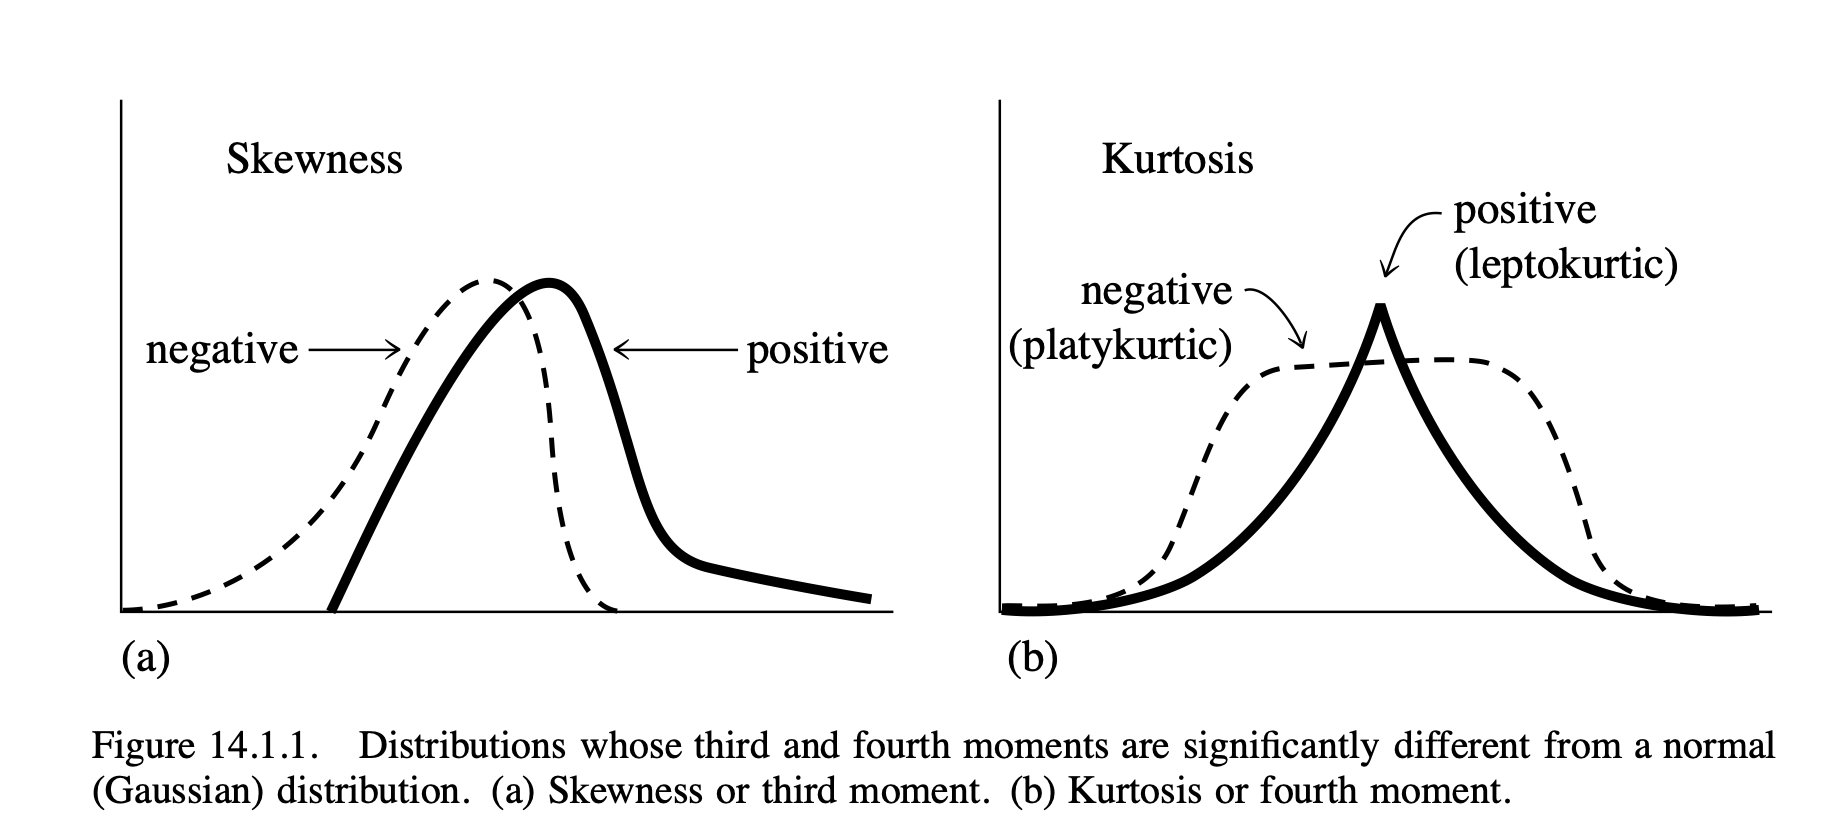

### Exercise

Compute skewness and kurtosis of previous examples

### The central limit theorem

### The null hypothesis and the alternate hypothesis

We assume the null hypothesis and try to disprove it.

### Testing difference between means

In the NSFG data, the mean pregnancy length for first
babies is slightly longer, and the mean birth weight is slightly smaller. Is this effect significant?

### p-fishing

Careful with repeated testing!

![Don't be this guy](https://imgs.xkcd.com/comics/significant.png)

https://xkcd.com/882/

# Further reading

[Think Stats](https://greenteapress.com/wp/think-stats-2e/)

[Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)

[National Survey of Family Growth](https://www.cdc.gov/nchs/nsfg/index.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fnchs%2Fnsfg.htm)

[xkcd: Significant](https://xkcd.com/882/)

[Statistical modelling: the two cultures](https://projecteuclid.org/euclid.ss/1009213726)

https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/more-standard-deviation/v/review-and-intuition-why-we-divide-by-n-1-for-the-unbiased-sample-variance

